# Testing causal discovery

In [1]:
import numpy as np
import random
from tqdm.notebook import tqdm
from copy import deepcopy
import time
import torch
import torch.nn as nn 
import torch.nn.functional as F
import pytorch_lightning as pl
pl.seed_everything(42)

## Imports for plotting
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf') # For export
from matplotlib.colors import to_rgba
import seaborn as sns
sns.reset_orig()

Global seed set to 42


In [2]:
from graph_discovery import GraphDiscoveryMatrix
from utils import matrix_to_order
from causal_graphs.graph_real_world import load_graph_file
from causal_graphs.graph_generation import generate_categorical_graph, generate_chain, generate_random_graph, generate_jungle
from causal_graphs.graph_visualization import visualize_graph
from causal_graphs.graph_utils import adj_matrix_to_edges

## Graph setup

In [3]:
NUM_VARS = 10
NUM_CATEGS = 10

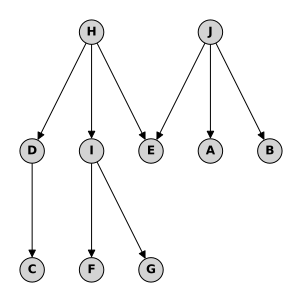

CausalDAG with 10 variables [H,D,C,I,F,G,J,E,A,B] and 9 edges:
H => D,I,E
D => C
I => F,G
J => E,A,B



In [17]:
graph = generate_categorical_graph(num_vars=NUM_VARS,
                                   min_categs=NUM_CATEGS,
                                   max_categs=NUM_CATEGS,
                                   edge_prob=0.2,
                                   connected=True,
                                   seed=42)
visualize_graph(graph, show_plot=True, figsize=(4, 4), layout="graphviz")
print(graph)

## Checking matrix to order

In [5]:
theta_matrix = torch.FloatTensor([[ 0.0, -1.0, -2.0],
                                  [ 1.0,  0.0,  3.0],
                                  [ 2.0, -3.0,  0.0]])
matrix_to_order(theta_matrix)

tensor([1, 2, 0])

## Fitting

In [6]:
discovery_module = GraphDiscoveryMatrix(graph=graph, model_iters=1000, lambda_sparse=0.001, batch_size=128, lr_permut=5e-3, lr_gamma=0.0,
                                        N_s=1, C_s=200,
                                        order_grads_opt='weight_expect_no_denom_weight_intervention', edge_grads_opt='weight_expect')
discovery_module.to(torch.device("cuda:0"))
print(discovery_module.gamma)

Parameter containing:
tensor([[-9.0000e+15,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00, -9.0000e+15,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00, -9.0000e+15,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00, -9.0000e+15,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00, -9.0000e+15,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         -9.0000e+15,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          

In [7]:
# true_gamma = torch.from_numpy(graph.adj_matrix).float()
# true_gamma = true_gamma + true_gamma.T
# true_gamma.masked_fill_(true_gamma == 0, -9e15)
# true_gamma.masked_fill_(true_gamma == 1, 9e15)
# discovery_module.gamma.data = true_gamma.contiguous()

In [18]:
discovery_module.discover_graph(num_epochs=50)

Gamma - Recall: 0.00%, Precision: 0.00% (TP=0,FP=0,FN=9,TN=81)
Theta - Direction accuracy: 100.00% (TP=9,FN=0) / Soft accuracy: 100.00% (TP=9,FN=0)


Gamma - Recall: 0.00%, Precision: 0.00% (TP=0,FP=0,FN=9,TN=81)
Theta - Direction accuracy: 100.00% (TP=9,FN=0) / Soft accuracy: 100.00% (TP=9,FN=0)


Gamma - Recall: 0.00%, Precision: 0.00% (TP=0,FP=0,FN=9,TN=81)
Theta - Direction accuracy: 100.00% (TP=9,FN=0) / Soft accuracy: 100.00% (TP=9,FN=0)


Gamma - Recall: 0.00%, Precision: 0.00% (TP=0,FP=0,FN=9,TN=81)
Theta - Direction accuracy: 100.00% (TP=9,FN=0) / Soft accuracy: 100.00% (TP=9,FN=0)


Gamma - Recall: 0.00%, Precision: 0.00% (TP=0,FP=0,FN=9,TN=81)
Theta - Direction accuracy: 100.00% (TP=9,FN=0) / Soft accuracy: 100.00% (TP=9,FN=0)


Gamma - Recall: 0.00%, Precision: 0.00% (TP=0,FP=0,FN=9,TN=81)
Theta - Direction accuracy: 100.00% (TP=9,FN=0) / Soft accuracy: 100.00% (TP=9,FN=0)


Gamma - Recall: 0.00%, Precision: 0.00% (TP=0,FP=0,FN=9,TN=81)
Theta - Direction accuracy: 100.00% (TP=9,FN=0) / Soft accuracy: 100.00% (TP=9,FN=0)


Gamma - Recall: 0.00%, Precision: 0.00% (TP=0,FP=0,FN=9,TN=81)
Theta - Direction accuracy: 100.00% (TP=9,FN=0) / Soft accuracy: 100.00% (TP=9,FN=0)


Gamma - Recall: 0.00%, Precision: 0.00% (TP=0,FP=0,FN=9,TN=81)
Theta - Direction accuracy: 100.00% (TP=9,FN=0) / Soft accuracy: 100.00% (TP=9,FN=0)


Gamma - Recall: 0.00%, Precision: 0.00% (TP=0,FP=0,FN=9,TN=81)
Theta - Direction accuracy: 100.00% (TP=9,FN=0) / Soft accuracy: 100.00% (TP=9,FN=0)


Gamma - Recall: 0.00%, Precision: 0.00% (TP=0,FP=0,FN=9,TN=81)
Theta - Direction accuracy: 100.00% (TP=9,FN=0) / Soft accuracy: 100.00% (TP=9,FN=0)


Gamma - Recall: 0.00%, Precision: 0.00% (TP=0,FP=0,FN=9,TN=81)
Theta - Direction accuracy: 100.00% (TP=9,FN=0) / Soft accuracy: 100.00% (TP=9,FN=0)


Gamma - Recall: 0.00%, Precision: 0.00% (TP=0,FP=0,FN=9,TN=81)
Theta - Direction accuracy: 100.00% (TP=9,FN=0) / Soft accuracy: 100.00% (TP=9,FN=0)


Gamma - Recall: 0.00%, Precision: 0.00% (TP=0,FP=0,FN=9,TN=81)
Theta - Direction accuracy: 100.00% (TP=9,FN=0) / Soft accuracy: 100.00% (TP=9,FN=0)


Gamma - Recall: 0.00%, Precision: 0.00% (TP=0,FP=0,FN=9,TN=81)
Theta - Direction accuracy: 100.00% (TP=9,FN=0) / Soft accuracy: 100.00% (TP=9,FN=0)


Gamma - Recall: 0.00%, Precision: 0.00% (TP=0,FP=0,FN=9,TN=81)
Theta - Direction accuracy: 100.00% (TP=9,FN=0) / Soft accuracy: 100.00% (TP=9,FN=0)


Gamma - Recall: 0.00%, Precision: 0.00% (TP=0,FP=0,FN=9,TN=81)
Theta - Direction accuracy: 100.00% (TP=9,FN=0) / Soft accuracy: 100.00% (TP=9,FN=0)


Gamma - Recall: 0.00%, Precision: 0.00% (TP=0,FP=0,FN=9,TN=81)
Theta - Direction accuracy: 100.00% (TP=9,FN=0) / Soft accuracy: 100.00% (TP=9,FN=0)


Gamma - Recall: 0.00%, Precision: 0.00% (TP=0,FP=0,FN=9,TN=81)
Theta - Direction accuracy: 100.00% (TP=9,FN=0) / Soft accuracy: 100.00% (TP=9,FN=0)


Gamma - Recall: 0.00%, Precision: 0.00% (TP=0,FP=0,FN=9,TN=81)
Theta - Direction accuracy: 100.00% (TP=9,FN=0) / Soft accuracy: 100.00% (TP=9,FN=0)


Gamma - Recall: 0.00%, Precision: 0.00% (TP=0,FP=0,FN=9,TN=81)
Theta - Direction accuracy: 100.00% (TP=9,FN=0) / Soft accuracy: 100.00% (TP=9,FN=0)


Gamma - Recall: 0.00%, Precision: 0.00% (TP=0,FP=0,FN=9,TN=81)
Theta - Direction accuracy: 100.00% (TP=9,FN=0) / Soft accuracy: 100.00% (TP=9,FN=0)


Gamma - Recall: 0.00%, Precision: 0.00% (TP=0,FP=0,FN=9,TN=81)
Theta - Direction accuracy: 100.00% (TP=9,FN=0) / Soft accuracy: 100.00% (TP=9,FN=0)


Gamma - Recall: 0.00%, Precision: 0.00% (TP=0,FP=0,FN=9,TN=81)
Theta - Direction accuracy: 100.00% (TP=9,FN=0) / Soft accuracy: 100.00% (TP=9,FN=0)


Gamma - Recall: 0.00%, Precision: 0.00% (TP=0,FP=0,FN=9,TN=81)
Theta - Direction accuracy: 100.00% (TP=9,FN=0) / Soft accuracy: 100.00% (TP=9,FN=0)


Gamma - Recall: 0.00%, Precision: 0.00% (TP=0,FP=0,FN=9,TN=81)
Theta - Direction accuracy: 100.00% (TP=9,FN=0) / Soft accuracy: 100.00% (TP=9,FN=0)


Gamma - Recall: 0.00%, Precision: 0.00% (TP=0,FP=0,FN=9,TN=81)
Theta - Direction accuracy: 100.00% (TP=9,FN=0) / Soft accuracy: 100.00% (TP=9,FN=0)


Gamma - Recall: 0.00%, Precision: 0.00% (TP=0,FP=0,FN=9,TN=81)
Theta - Direction accuracy: 100.00% (TP=9,FN=0) / Soft accuracy: 100.00% (TP=9,FN=0)


Gamma - Recall: 0.00%, Precision: 0.00% (TP=0,FP=0,FN=9,TN=81)
Theta - Direction accuracy: 100.00% (TP=9,FN=0) / Soft accuracy: 100.00% (TP=9,FN=0)


Gamma - Recall: 0.00%, Precision: 0.00% (TP=0,FP=0,FN=9,TN=81)
Theta - Direction accuracy: 100.00% (TP=9,FN=0) / Soft accuracy: 100.00% (TP=9,FN=0)


Gamma - Recall: 0.00%, Precision: 0.00% (TP=0,FP=0,FN=9,TN=81)
Theta - Direction accuracy: 100.00% (TP=9,FN=0) / Soft accuracy: 100.00% (TP=9,FN=0)


Gamma - Recall: 0.00%, Precision: 0.00% (TP=0,FP=0,FN=9,TN=81)
Theta - Direction accuracy: 100.00% (TP=9,FN=0) / Soft accuracy: 100.00% (TP=9,FN=0)


Gamma - Recall: 0.00%, Precision: 0.00% (TP=0,FP=0,FN=9,TN=81)
Theta - Direction accuracy: 100.00% (TP=9,FN=0) / Soft accuracy: 100.00% (TP=9,FN=0)


Gamma - Recall: 0.00%, Precision: 0.00% (TP=0,FP=0,FN=9,TN=81)
Theta - Direction accuracy: 100.00% (TP=9,FN=0) / Soft accuracy: 100.00% (TP=9,FN=0)


Gamma - Recall: 0.00%, Precision: 0.00% (TP=0,FP=0,FN=9,TN=81)
Theta - Direction accuracy: 100.00% (TP=9,FN=0) / Soft accuracy: 100.00% (TP=9,FN=0)


Gamma - Recall: 0.00%, Precision: 0.00% (TP=0,FP=0,FN=9,TN=81)
Theta - Direction accuracy: 100.00% (TP=9,FN=0) / Soft accuracy: 100.00% (TP=9,FN=0)


Gamma - Recall: 0.00%, Precision: 0.00% (TP=0,FP=0,FN=9,TN=81)
Theta - Direction accuracy: 100.00% (TP=9,FN=0) / Soft accuracy: 100.00% (TP=9,FN=0)


Gamma - Recall: 0.00%, Precision: 0.00% (TP=0,FP=0,FN=9,TN=81)
Theta - Direction accuracy: 100.00% (TP=9,FN=0) / Soft accuracy: 100.00% (TP=9,FN=0)


Gamma - Recall: 0.00%, Precision: 0.00% (TP=0,FP=0,FN=9,TN=81)
Theta - Direction accuracy: 100.00% (TP=9,FN=0) / Soft accuracy: 100.00% (TP=9,FN=0)


Gamma - Recall: 0.00%, Precision: 0.00% (TP=0,FP=0,FN=9,TN=81)
Theta - Direction accuracy: 100.00% (TP=9,FN=0) / Soft accuracy: 100.00% (TP=9,FN=0)


Gamma - Recall: 0.00%, Precision: 0.00% (TP=0,FP=0,FN=9,TN=81)
Theta - Direction accuracy: 100.00% (TP=9,FN=0) / Soft accuracy: 100.00% (TP=9,FN=0)


Gamma - Recall: 0.00%, Precision: 0.00% (TP=0,FP=0,FN=9,TN=81)
Theta - Direction accuracy: 100.00% (TP=9,FN=0) / Soft accuracy: 100.00% (TP=9,FN=0)


Gamma - Recall: 0.00%, Precision: 0.00% (TP=0,FP=0,FN=9,TN=81)
Theta - Direction accuracy: 100.00% (TP=9,FN=0) / Soft accuracy: 100.00% (TP=9,FN=0)


Gamma - Recall: 0.00%, Precision: 0.00% (TP=0,FP=0,FN=9,TN=81)
Theta - Direction accuracy: 100.00% (TP=9,FN=0) / Soft accuracy: 100.00% (TP=9,FN=0)


Gamma - Recall: 0.00%, Precision: 0.00% (TP=0,FP=0,FN=9,TN=81)
Theta - Direction accuracy: 100.00% (TP=9,FN=0) / Soft accuracy: 100.00% (TP=9,FN=0)


Gamma - Recall: 0.00%, Precision: 0.00% (TP=0,FP=0,FN=9,TN=81)
Theta - Direction accuracy: 100.00% (TP=9,FN=0) / Soft accuracy: 100.00% (TP=9,FN=0)


Gamma - Recall: 0.00%, Precision: 0.00% (TP=0,FP=0,FN=9,TN=81)
Theta - Direction accuracy: 100.00% (TP=9,FN=0) / Soft accuracy: 100.00% (TP=9,FN=0)


Gamma - Recall: 0.00%, Precision: 0.00% (TP=0,FP=0,FN=9,TN=81)
Theta - Direction accuracy: 100.00% (TP=9,FN=0) / Soft accuracy: 100.00% (TP=9,FN=0)


Gamma - Recall: 0.00%, Precision: 0.00% (TP=0,FP=0,FN=9,TN=81)
Theta - Direction accuracy: 100.00% (TP=9,FN=0) / Soft accuracy: 100.00% (TP=9,FN=0)


Gamma - Recall: 0.00%, Precision: 0.00% (TP=0,FP=0,FN=9,TN=81)
Theta - Direction accuracy: 100.00% (TP=9,FN=0) / Soft accuracy: 100.00% (TP=9,FN=0)


Parameter containing:
tensor([[-9.0000e+15,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00, -9.0000e+15,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00, -9.0000e+15,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00, -9.0000e+15,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00, -9.0000e+15,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         -9.0000e+15,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          

In [19]:
discovery_module.theta_matrix

Parameter containing:
tensor([[ 0.0000e+00,  5.7826e+00,  3.8404e+00,  5.7078e+00,  2.7995e+00,
          3.5729e+00,  2.8685e-01,  5.7644e+00, -3.9525e-02, -7.5620e-01],
        [-5.7826e+00,  0.0000e+00,  5.7292e+00,  3.8353e-01,  1.3013e-01,
          7.7250e-02,  7.0172e-01, -1.0917e-01,  1.8461e-02,  2.9012e-01],
        [-3.8404e+00, -5.7292e+00,  0.0000e+00, -2.5953e-01,  1.0938e-03,
          1.9275e-01,  6.8817e-01,  1.2994e-02, -3.7125e-02, -1.1325e+00],
        [-5.7078e+00, -3.8353e-01,  2.5953e-01,  0.0000e+00,  5.7486e+00,
          5.6591e+00,  5.2950e-02, -7.5226e-01,  1.6886e-01, -1.1411e-01],
        [-2.7995e+00, -1.3013e-01, -1.0938e-03, -5.7486e+00,  0.0000e+00,
         -1.5660e-01,  1.4211e-01, -8.5663e-01,  7.0391e-01, -1.7744e-01],
        [-3.5729e+00, -7.7250e-02, -1.9275e-01, -5.6591e+00,  1.5660e-01,
          0.0000e+00,  5.6953e-02,  1.5240e-01, -6.7314e-01,  8.2954e-01],
        [-2.8685e-01, -7.0172e-01, -6.8817e-01, -5.2950e-02, -1.4211e-01,
         -

In [20]:
discovery_module.gamma

Parameter containing:
tensor([[-9.0000e+15,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00, -9.0000e+15,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00, -9.0000e+15,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00, -9.0000e+15,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00, -9.0000e+15,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         -9.0000e+15,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          

In [21]:
torch.round(torch.sigmoid(discovery_module.theta_matrix)*100)

tensor([[ 50., 100.,  98., 100.,  94.,  97.,  57., 100.,  49.,  32.],
        [  0.,  50., 100.,  59.,  53.,  52.,  67.,  47.,  50.,  57.],
        [  2.,   0.,  50.,  44.,  50.,  55.,  67.,  50.,  49.,  24.],
        [  0.,  41.,  56.,  50., 100., 100.,  51.,  32.,  54.,  47.],
        [  6.,  47.,  50.,   0.,  50.,  46.,  54.,  30.,  67.,  46.],
        [  3.,  48.,  45.,   0.,  54.,  50.,  51.,  54.,  34.,  70.],
        [ 43.,  33.,  33.,  49.,  46.,  49.,  50., 100., 100., 100.],
        [  0.,  53.,  50.,  68.,  70.,  46.,   0.,  50.,  57.,  66.],
        [ 51.,  50.,  51.,  46.,  33.,  66.,   0.,  43.,  50.,  57.],
        [ 68.,  43.,  76.,  53.,  54.,  30.,   0.,  34.,  43.,  50.]],
       grad_fn=<RoundBackward>)

## Testing self-build example

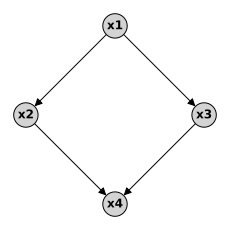

CausalDAG with 4 variables [x1,x2,x3,x4] and 4 edges:
x1 => x2,x3
x2 => x4
x3 => x4



In [42]:
graph = load_graph_file('../causal_graphs/real_data/test_diamond.bif')
visualize_graph(graph, show_plot=True, figsize=(3,3))
print(graph)

In [43]:
discovery_module = GraphDiscoveryMatrix(graph=graph, model_iters=1000, lambda_sparse=0.1, batch_size=128, lr_permut=5e-3, lr_gamma=5e-3,
                                        N_s=1, C_s=200, gamma_iters=100,
                                        order_grads_opt='weight_expect_no_denom_weight_intervention', edge_grads_opt='weight_expect')
discovery_module.to(torch.device("cuda:0"))
print(discovery_module.gamma)

Parameter containing:
tensor([[-9.0000e+15,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00, -9.0000e+15,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00, -9.0000e+15,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00, -9.0000e+15]],
       requires_grad=True)


In [28]:
"""
discovery_module.gamma.data = torch.FloatTensor([
    [-9e+15, 5.0, -5.0, -5.0, -5.0, -5.0],
    [-5.0, -9e+15, 5.0, -5.0, -5.0, -5.0],
    [5.0, -5.0, -9e+15, 5.0, -5.0, -5.0],
    [-5.0, -5.0, -5.0, -9e+15, 5.0, -5.0],
    [-5.0, -5.0, -5.0, -5.0, -9e+15, 5.0],
    [-5.0, -5.0, -5.0, -5.0, -5.0, -9e+15],
])
discovery_module.theta_matrix.data = torch.FloatTensor([
    [0.0, 5.0, 0.0, 0.0, 0.0, 0.0],
    [-5.0, 0.0, 5.0, 0.0, 0.0, 0.0],
    [0.0, -5.0, 0.0, 5.0, 0.0, 0.0],
    [0.0, 0.0, -5.0, 0.0, 5.0, 0.0],
    [0.0, 0.0, 0.0, -5.0, 0.0, 5.0],
    [0.0, 0.0, 0.0, 0.0, -5.0, 0.0]
])
"""

'\ndiscovery_module.gamma.data = torch.FloatTensor([\n    [-9e+15, 5.0, -5.0, -5.0, -5.0, -5.0],\n    [-5.0, -9e+15, 5.0, -5.0, -5.0, -5.0],\n    [5.0, -5.0, -9e+15, 5.0, -5.0, -5.0],\n    [-5.0, -5.0, -5.0, -9e+15, 5.0, -5.0],\n    [-5.0, -5.0, -5.0, -5.0, -9e+15, 5.0],\n    [-5.0, -5.0, -5.0, -5.0, -5.0, -9e+15],\n])\ndiscovery_module.theta_matrix.data = torch.FloatTensor([\n    [0.0, 5.0, 0.0, 0.0, 0.0, 0.0],\n    [-5.0, 0.0, 5.0, 0.0, 0.0, 0.0],\n    [0.0, -5.0, 0.0, 5.0, 0.0, 0.0],\n    [0.0, 0.0, -5.0, 0.0, 5.0, 0.0],\n    [0.0, 0.0, 0.0, -5.0, 0.0, 5.0],\n    [0.0, 0.0, 0.0, 0.0, -5.0, 0.0]\n])\n'

In [44]:
discovery_module.gamma.data = torch.FloatTensor([
    [-9e+15, 5.0, 5.0, -5.0],
    [0.0, -9e+15, 0.0, -5.0],
    [0.0, 0.0, -9e+15, -5.0],
    [-5.0, -5.0, -5.0, -9e+15]
])

In [45]:
discovery_module.discover_graph(num_epochs=20)

Gamma - Recall: 50.00%, Precision: 100.00% (TP=2,FP=0,FN=2,TN=8)
Theta - Direction accuracy: 75.00% (TP=3,FN=1) / Soft accuracy: 75.00% (TP=3,FN=1)


Gamma - Recall: 50.00%, Precision: 100.00% (TP=2,FP=0,FN=2,TN=8)
Theta - Direction accuracy: 75.00% (TP=3,FN=1) / Soft accuracy: 75.00% (TP=3,FN=1)


Gamma - Recall: 50.00%, Precision: 100.00% (TP=2,FP=0,FN=2,TN=8)
Theta - Direction accuracy: 50.00% (TP=2,FN=2) / Soft accuracy: 75.00% (TP=3,FN=1)


Gamma - Recall: 50.00%, Precision: 100.00% (TP=2,FP=0,FN=2,TN=8)
Theta - Direction accuracy: 75.00% (TP=3,FN=1) / Soft accuracy: 75.00% (TP=3,FN=1)


Gamma - Recall: 50.00%, Precision: 100.00% (TP=2,FP=0,FN=2,TN=8)
Theta - Direction accuracy: 75.00% (TP=3,FN=1) / Soft accuracy: 75.00% (TP=3,FN=1)


Gamma - Recall: 50.00%, Precision: 100.00% (TP=2,FP=0,FN=2,TN=8)
Theta - Direction accuracy: 50.00% (TP=2,FN=2) / Soft accuracy: 75.00% (TP=3,FN=1)


Gamma - Recall: 50.00%, Precision: 100.00% (TP=2,FP=0,FN=2,TN=8)
Theta - Direction accuracy: 50.00% (TP=2,FN=2) / Soft accuracy: 75.00% (TP=3,FN=1)


Gamma - Recall: 50.00%, Precision: 100.00% (TP=2,FP=0,FN=2,TN=8)
Theta - Direction accuracy: 50.00% (TP=2,FN=2) / Soft accuracy: 50.00% (TP=2,FN=2)


Gamma - Recall: 50.00%, Precision: 100.00% (TP=2,FP=0,FN=2,TN=8)
Theta - Direction accuracy: 50.00% (TP=2,FN=2) / Soft accuracy: 50.00% (TP=2,FN=2)


Gamma - Recall: 50.00%, Precision: 100.00% (TP=2,FP=0,FN=2,TN=8)
Theta - Direction accuracy: 50.00% (TP=2,FN=2) / Soft accuracy: 50.00% (TP=2,FN=2)


Gamma - Recall: 50.00%, Precision: 100.00% (TP=2,FP=0,FN=2,TN=8)
Theta - Direction accuracy: 50.00% (TP=2,FN=2) / Soft accuracy: 75.00% (TP=3,FN=1)


Gamma - Recall: 50.00%, Precision: 100.00% (TP=2,FP=0,FN=2,TN=8)
Theta - Direction accuracy: 50.00% (TP=2,FN=2) / Soft accuracy: 75.00% (TP=3,FN=1)


Gamma - Recall: 50.00%, Precision: 100.00% (TP=2,FP=0,FN=2,TN=8)
Theta - Direction accuracy: 75.00% (TP=3,FN=1) / Soft accuracy: 75.00% (TP=3,FN=1)


Gamma - Recall: 50.00%, Precision: 100.00% (TP=2,FP=0,FN=2,TN=8)
Theta - Direction accuracy: 100.00% (TP=4,FN=0) / Soft accuracy: 75.00% (TP=3,FN=1)


Gamma - Recall: 50.00%, Precision: 100.00% (TP=2,FP=0,FN=2,TN=8)
Theta - Direction accuracy: 100.00% (TP=4,FN=0) / Soft accuracy: 75.00% (TP=3,FN=1)


Gamma - Recall: 50.00%, Precision: 100.00% (TP=2,FP=0,FN=2,TN=8)
Theta - Direction accuracy: 100.00% (TP=4,FN=0) / Soft accuracy: 75.00% (TP=3,FN=1)


Gamma - Recall: 50.00%, Precision: 100.00% (TP=2,FP=0,FN=2,TN=8)
Theta - Direction accuracy: 50.00% (TP=2,FN=2) / Soft accuracy: 75.00% (TP=3,FN=1)


Gamma - Recall: 50.00%, Precision: 100.00% (TP=2,FP=0,FN=2,TN=8)
Theta - Direction accuracy: 75.00% (TP=3,FN=1) / Soft accuracy: 75.00% (TP=3,FN=1)


Gamma - Recall: 50.00%, Precision: 100.00% (TP=2,FP=0,FN=2,TN=8)
Theta - Direction accuracy: 100.00% (TP=4,FN=0) / Soft accuracy: 75.00% (TP=3,FN=1)


Gamma - Recall: 50.00%, Precision: 100.00% (TP=2,FP=0,FN=2,TN=8)
Theta - Direction accuracy: 100.00% (TP=4,FN=0) / Soft accuracy: 75.00% (TP=3,FN=1)


Parameter containing:
tensor([[-9.0000e+15,  5.5990e+00,  5.6203e+00, -1.3057e+01],
        [ 4.1671e-01, -9.0000e+15, -6.5271e+00, -1.3029e+01],
        [ 6.5255e-01, -6.5445e+00, -9.0000e+15, -1.2818e+01],
        [-1.2817e+01, -1.2749e+01, -1.2709e+01, -9.0000e+15]],
       requires_grad=True)

In [46]:
discovery_module.theta_matrix

Parameter containing:
tensor([[ 0.0000,  3.8466,  3.8614, -0.0842],
        [-3.8466,  0.0000, -0.0842,  0.1694],
        [-3.8614,  0.0842,  0.0000, -0.0262],
        [ 0.0842, -0.1694,  0.0262,  0.0000]], requires_grad=True)

In [47]:
discovery_module.gamma.grad

tensor([[ 0.0000e+00,  3.6574e-04,  0.0000e+00,  2.1444e-07],
        [-3.0199e-02,  0.0000e+00,  0.0000e+00,  2.2054e-07],
        [ 2.2481e-02,  1.4406e-04,  0.0000e+00,  2.7233e-07],
        [ 2.7269e-07,  2.9173e-07,  0.0000e+00,  0.0000e+00]])

In [48]:
torch.round(torch.sigmoid(discovery_module.theta_matrix)*100)

tensor([[50., 98., 98., 48.],
        [ 2., 50., 48., 54.],
        [ 2., 52., 50., 49.],
        [52., 46., 51., 50.]], grad_fn=<RoundBackward>)

## Latent confounders

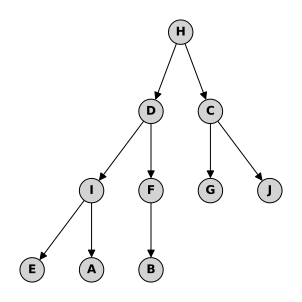

CausalDAG with 10 variables [H,D,C,I,F,G,J,E,A,B] and 9 edges:
H => D,C
D => I,F
C => G,J
I => E,A
F => B



In [7]:
NUM_VARS = 10
NUM_CATEGS = 10

graph = generate_categorical_graph(num_vars=NUM_VARS,
                                   min_categs=NUM_CATEGS,
                                   max_categs=NUM_CATEGS,
                                   graph_func=lambda *args, **kwargs: generate_jungle(*args, **kwargs, num_levels=1),
                                   use_nn=True,
                                   seed=42)
visualize_graph(graph, show_plot=True, figsize=(4, 4), layout="graphviz")
print(graph)

In [9]:
discovery_module = GraphDiscoveryMatrix(graph=graph, model_iters=1000, lambda_sparse=0.001, batch_size=128, lr_permut=5e-3, lr_gamma=5e-3,
                                        N_s=1, C_s=200,
                                        order_grads_opt='weight_expect_no_denom_weight_intervention', edge_grads_opt='weight_expect')
discovery_module.to(torch.device("cuda:0"))
print(discovery_module.gamma)

Parameter containing:
tensor([[-9.0000e+15,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00, -9.0000e+15,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00, -9.0000e+15,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00, -9.0000e+15,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00, -9.0000e+15,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         -9.0000e+15,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          

In [10]:
discovery_module.gamma.data[0,1:] = -9e15
discovery_module.gamma.data[1:,0] = -9e15
print(discovery_module.gamma)

Parameter containing:
tensor([[-9.0000e+15, -9.0000e+15, -9.0000e+15, -9.0000e+15, -9.0000e+15,
         -9.0000e+15, -9.0000e+15, -9.0000e+15, -9.0000e+15, -9.0000e+15],
        [-9.0000e+15, -9.0000e+15,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [-9.0000e+15,  0.0000e+00, -9.0000e+15,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [-9.0000e+15,  0.0000e+00,  0.0000e+00, -9.0000e+15,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [-9.0000e+15,  0.0000e+00,  0.0000e+00,  0.0000e+00, -9.0000e+15,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [-9.0000e+15,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         -9.0000e+15,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [-9.0000e+15,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          

In [11]:
discovery_module.discover_graph(num_epochs=20)

Gamma - Recall: 77.78%, Precision: 46.67% (TP=7,FP=8,FN=2,TN=73)
Theta - Direction accuracy: 88.89% (TP=8,FN=1) / Soft accuracy: 88.89% (TP=8,FN=1)


Gamma - Recall: 77.78%, Precision: 50.00% (TP=7,FP=7,FN=2,TN=74)
Theta - Direction accuracy: 77.78% (TP=7,FN=2) / Soft accuracy: 88.89% (TP=8,FN=1)


Gamma - Recall: 77.78%, Precision: 53.85% (TP=7,FP=6,FN=2,TN=75)
Theta - Direction accuracy: 88.89% (TP=8,FN=1) / Soft accuracy: 88.89% (TP=8,FN=1)


Gamma - Recall: 77.78%, Precision: 53.85% (TP=7,FP=6,FN=2,TN=75)
Theta - Direction accuracy: 88.89% (TP=8,FN=1) / Soft accuracy: 100.00% (TP=9,FN=0)


Gamma - Recall: 77.78%, Precision: 53.85% (TP=7,FP=6,FN=2,TN=75)
Theta - Direction accuracy: 77.78% (TP=7,FN=2) / Soft accuracy: 100.00% (TP=9,FN=0)


Gamma - Recall: 77.78%, Precision: 53.85% (TP=7,FP=6,FN=2,TN=75)
Theta - Direction accuracy: 77.78% (TP=7,FN=2) / Soft accuracy: 88.89% (TP=8,FN=1)


Gamma - Recall: 77.78%, Precision: 50.00% (TP=7,FP=7,FN=2,TN=74)
Theta - Direction accuracy: 77.78% (TP=7,FN=2) / Soft accuracy: 88.89% (TP=8,FN=1)


Gamma - Recall: 77.78%, Precision: 53.85% (TP=7,FP=6,FN=2,TN=75)
Theta - Direction accuracy: 88.89% (TP=8,FN=1) / Soft accuracy: 88.89% (TP=8,FN=1)


Gamma - Recall: 77.78%, Precision: 53.85% (TP=7,FP=6,FN=2,TN=75)
Theta - Direction accuracy: 100.00% (TP=9,FN=0) / Soft accuracy: 88.89% (TP=8,FN=1)


Gamma - Recall: 77.78%, Precision: 53.85% (TP=7,FP=6,FN=2,TN=75)
Theta - Direction accuracy: 100.00% (TP=9,FN=0) / Soft accuracy: 88.89% (TP=8,FN=1)


Gamma - Recall: 77.78%, Precision: 53.85% (TP=7,FP=6,FN=2,TN=75)
Theta - Direction accuracy: 100.00% (TP=9,FN=0) / Soft accuracy: 88.89% (TP=8,FN=1)


Gamma - Recall: 77.78%, Precision: 58.33% (TP=7,FP=5,FN=2,TN=76)
Theta - Direction accuracy: 77.78% (TP=7,FN=2) / Soft accuracy: 88.89% (TP=8,FN=1)


Gamma - Recall: 77.78%, Precision: 58.33% (TP=7,FP=5,FN=2,TN=76)
Theta - Direction accuracy: 100.00% (TP=9,FN=0) / Soft accuracy: 88.89% (TP=8,FN=1)


Gamma - Recall: 77.78%, Precision: 63.64% (TP=7,FP=4,FN=2,TN=77)
Theta - Direction accuracy: 77.78% (TP=7,FN=2) / Soft accuracy: 88.89% (TP=8,FN=1)


Gamma - Recall: 77.78%, Precision: 63.64% (TP=7,FP=4,FN=2,TN=77)
Theta - Direction accuracy: 77.78% (TP=7,FN=2) / Soft accuracy: 88.89% (TP=8,FN=1)


Gamma - Recall: 77.78%, Precision: 63.64% (TP=7,FP=4,FN=2,TN=77)
Theta - Direction accuracy: 100.00% (TP=9,FN=0) / Soft accuracy: 100.00% (TP=9,FN=0)


Gamma - Recall: 77.78%, Precision: 70.00% (TP=7,FP=3,FN=2,TN=78)
Theta - Direction accuracy: 100.00% (TP=9,FN=0) / Soft accuracy: 88.89% (TP=8,FN=1)


Gamma - Recall: 77.78%, Precision: 70.00% (TP=7,FP=3,FN=2,TN=78)
Theta - Direction accuracy: 100.00% (TP=9,FN=0) / Soft accuracy: 88.89% (TP=8,FN=1)


Gamma - Recall: 77.78%, Precision: 70.00% (TP=7,FP=3,FN=2,TN=78)
Theta - Direction accuracy: 100.00% (TP=9,FN=0) / Soft accuracy: 88.89% (TP=8,FN=1)


Gamma - Recall: 77.78%, Precision: 70.00% (TP=7,FP=3,FN=2,TN=78)
Theta - Direction accuracy: 100.00% (TP=9,FN=0) / Soft accuracy: 88.89% (TP=8,FN=1)


Parameter containing:
tensor([[-9.0000e+15, -9.0000e+15, -9.0000e+15, -9.0000e+15, -9.0000e+15,
         -9.0000e+15, -9.0000e+15, -9.0000e+15, -9.0000e+15, -9.0000e+15],
        [-9.0000e+15, -9.0000e+15,  4.0433e+00,  6.0072e+00,  6.3926e+00,
         -1.8531e+00, -1.4259e+00, -2.6743e-01, -4.6605e-01, -1.5678e+00],
        [-9.0000e+15,  4.5416e+00, -9.0000e+15, -2.8381e-01, -1.3865e+00,
          6.2575e+00,  6.3114e+00, -1.4356e+00, -1.2897e+00, -1.8695e+00],
        [-9.0000e+15,  3.0099e+00, -8.3996e-01, -9.0000e+15, -9.9591e-01,
         -2.5745e+00, -1.0180e+00,  6.4656e+00,  6.4491e+00, -1.8524e+00],
        [-9.0000e+15,  3.4220e+00, -6.3385e-01, -4.0944e-01, -9.0000e+15,
         -2.4071e+00, -1.2393e+00, -9.8256e-01, -1.3139e+00,  6.2646e+00],
        [-9.0000e+15, -1.1856e+00,  2.9892e+00, -6.9505e-01, -1.2644e+00,
         -9.0000e+15, -1.0226e+00, -9.4451e-01, -1.2103e+00, -1.4980e+00],
        [-9.0000e+15, -1.4515e+00,  3.5317e+00, -1.0039e+00, -1.2771e+00,
          

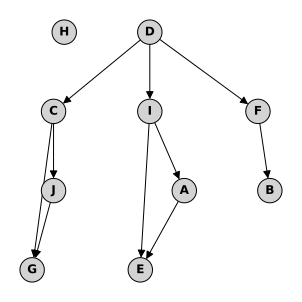

In [12]:
pred_graph = deepcopy(graph)
pred_graph.adj_matrix = discovery_module.get_binary_adjmatrix().detach().cpu().numpy()
pred_graph.edges = adj_matrix_to_edges(pred_graph.adj_matrix)
visualize_graph(pred_graph, 
                show_plot=True,
                figsize=(4, 4), 
                layout="graphviz")

In [13]:
discovery_module.theta_matrix

Parameter containing:
tensor([[ 0.0000, -0.0846,  0.0390,  0.2922,  0.0451,  0.0347,  0.0523,  0.3693,
         -0.1546, -0.0890],
        [ 0.0846,  0.0000,  0.1969,  3.3089,  3.2453,  0.3295, -0.2387,  1.8393,
          0.8350,  1.5097],
        [-0.0390, -0.1969,  0.0000, -0.2489, -0.2501,  3.2319,  3.2029,  0.3575,
          0.2153,  0.4009],
        [-0.2922, -3.3089,  0.2489,  0.0000, -0.1177,  0.0835, -0.2939,  3.1931,
          3.1903,  0.2438],
        [-0.0451, -3.2453,  0.2501,  0.1177,  0.0000,  0.3777,  0.0417, -0.2005,
         -0.1015,  3.0567],
        [-0.0347, -0.3295, -3.2319, -0.0835, -0.3777,  0.0000, -0.3675,  0.0736,
         -0.4475, -0.1174],
        [-0.0523,  0.2387, -3.2029,  0.2939, -0.0417,  0.3675,  0.0000,  0.0633,
          0.0879,  0.3350],
        [-0.3693, -1.8393, -0.3575, -3.1931,  0.2005, -0.0736, -0.0633,  0.0000,
         -0.3532, -0.1736],
        [ 0.1546, -0.8350, -0.2153, -3.1903,  0.1015,  0.4475, -0.0879,  0.3532,
          0.0000, -0.4312